# Data Preprocessing

>## **1. Import packages**

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
%matplotlib inline

>## **2. Load dataset**

In [ ]:
df= pd.read_csv('Biometric Data.csv')
df2= pd.read_csv('Medical Records.csv')
df3= pd.read_csv('Patient Data.csv')

In [ ]:
df.head(3)

,patient_id,age,gender,marital_status,ethnicity,zip_code
0,PAT00001,33.0,Male,Divorced,African American,92106
1,PAT00002,54.0,Female,Married,African American,24249
2,PAT00003,65.0,Female,Married,Caucasian,81306


In [ ]:
df2.head(3)

,record_id,patient_id,diagnosis,diagnosis_date,visit_type,physician,cost
0,REC000419,PAT03567,Common Cold,6/8/2020,Outpatient,Dr. Williams,160.03
1,REC002378,PAT09059,Common Cold,6/8/2020,Outpatient,Dr. Williams,158.39
2,REC002666,PAT13410,Common Cold,6/8/2020,Telehealth,Dr. Brown,61.55


In [ ]:
df3.head(3)

,patient_id,bmi,blood_pressure_systolic,blood_pressure_diastolic,cholesterol_total
0,PAT09803,26.341428,124,75,265.0
1,PAT15758,26.083063,130,78,172.0
2,PAT17050,23.629059,102,102,128.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      20000 non-null  object 
 1   age             19800 non-null  float64
 2   gender          19900 non-null  object 
 3   marital_status  20000 non-null  object 
 4   ethnicity       20000 non-null  object 
 5   zip_code        20000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 937.6+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   record_id       30000 non-null  object 
 1   patient_id      30000 non-null  object 
 2   diagnosis       30000 non-null  object 
 3   diagnosis_date  30000 non-null  object 
 4   visit_type      30000 non-null  object 
 5   physician       30000 non-null  object 
 6   cost            29850 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                14000 non-null  object 
 1   bmi                       13860 non-null  float64
 2   blood_pressure_systolic   14000 non-null  int64  
 3   blood_pressure_diastolic  14000 non-null  int64  
 4   cholesterol_total         13888 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 547.0+ KB


>## **3. Handle missing values**

I created a for loop to iterate among all columns to realize whether they have null values or not. I’m looking for the number of null values in every single column as well as the percentage of null values.

In [ ]:
for col in df.columns:
    number_null = df.loc[: , col].isnull().sum()
    perc_null = (number_null / df.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

patient_id - 0 - %0.0
age - 200 - %1.0
gender - 100 - %0.5
marital_status - 0 - %0.0
ethnicity - 0 - %0.0
zip_code - 0 - %0.0


In [ ]:
for col in df2.columns:
    number_null = df2.loc[: , col].isnull().sum()
    perc_null = (number_null / df2.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

record_id - 0 - %0.0
patient_id - 0 - %0.0
diagnosis - 0 - %0.0
diagnosis_date - 0 - %0.0
visit_type - 0 - %0.0
physician - 0 - %0.0
cost - 150 - %0.5


In [ ]:
for col in df3.columns:
    number_null = df3.loc[: , col].isnull().sum()
    perc_null = (number_null / df3.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

patient_id - 0 - %0.0
bmi - 140 - %1.0
blood_pressure_systolic - 0 - %0.0
blood_pressure_diastolic - 0 - %0.0
cholesterol_total - 112 - %0.8


In [ ]:
print(df.columns.tolist())
print(df2.columns.tolist())
print(df3.columns.tolist())

['patient_id', 'age', 'gender', 'marital_status', 'ethnicity', 'zip_code']
['record_id', 'patient_id', 'diagnosis', 'diagnosis_date', 'visit_type', 'physician', 'cost']
['patient_id', 'bmi', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'cholesterol_total']


#### **Treating Missing Values (less than 5%)**

For some columns that the percentage of null values are less than 5%, we can either drop the records or impute, and for those have more than 5%, we should impute using methods like "Mode", "Mean", "Random Forest".

For now, Let’s impute the null values with the Mode (Most Frequent Category) for columns: "age", "gender", "cost", "bmi", "cholesterol_total"

In [ ]:
# Find the most frequent category (mode)
mode_value = df['age'].mode()[0]
mode_value2 = df['gender'].mode()[0]

# Fill missing values with the mode
df['age'] = df['age'].fillna(mode_value)
df['gender'] = df['gender'].fillna(mode_value2)

In [ ]:
# Find the most frequent category (mode)
mode_value = df2['cost'].mode()[0]

# Fill missing values with the mode
df2['cost'] = df2['cost'].fillna(mode_value)

In [ ]:
# Find the most frequent category (mode)
mode_value = df3['bmi'].mode()[0]
mode_value2 = df3['cholesterol_total'].mode()[0]

# Fill missing values with the mode
df3['bmi'] = df3['bmi'].fillna(mode_value)
df3['cholesterol_total'] = df3['cholesterol_total'].fillna(mode_value2)

Integrity check: If still there is any Missing values for All columns

In [ ]:
df.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      20000 non-null  object 
 1   age             20000 non-null  float64
 2   gender          20000 non-null  object 
 3   marital_status  20000 non-null  object 
 4   ethnicity       20000 non-null  object 
 5   zip_code        20000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   record_id       30000 non-null  object 
 1   patient_id      30000 non-null  object 
 2   diagnosis       30000 non-null  object 
 3   diagnosis_date  30000 non-null  object 
 4   visit_type      30000 non-null  object 
 5   physician       30000 non-null  object 


In [ ]:
print('Misisng values of df \n \n', df.isna().sum(),'\n')

print('Misisng values of df2 \n \n', df2.isna().sum(),'\n')

print('Misisng values of df3 \n \n', df3.isna().sum(),'\n')

Misisng values of df 
 
 patient_id        0
age               0
gender            0
marital_status    0
ethnicity         0
zip_code          0
dtype: int64 

Misisng values of df2 
 
 record_id         0
patient_id        0
diagnosis         0
diagnosis_date    0
visit_type        0
physician         0
cost              0
dtype: int64 

Misisng values of df3 
 
 patient_id                  0
bmi                         0
blood_pressure_systolic     0
blood_pressure_diastolic    0
cholesterol_total           0
dtype: int64 



>## **4. Handle Inconsistencies**










we checked data and there is no inconsistencies

>## **5. Handle duplicate rows**

This ensures the data is free of duplicates for accurate analysis. We found that there is no duplicates









In [ ]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 0


In [ ]:
# Check for duplicates
duplicate_count = df2.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 0


In [ ]:
# Check for duplicates
duplicate_count = df3.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 0


=======================

>## **7. Data type convert**










Listing Data type

In [ ]:
# Display the column names along with their data types
print(df.dtypes, '\n')
print(df2.dtypes, '\n')
print(df3.dtypes)

patient_id         object
age               float64
gender             object
marital_status     object
ethnicity          object
zip_code            int64
dtype: object 

record_id          object
patient_id         object
diagnosis          object
diagnosis_date     object
visit_type         object
physician          object
cost              float64
dtype: object 

patient_id                   object
bmi                         float64
blood_pressure_systolic       int64
blood_pressure_diastolic      int64
cholesterol_total           float64
dtype: object


Convert 'DATE' to Date format (Not Datetime)

In [ ]:
# Convert 'diagnosis_date' to datetime if not already
df2['diagnosis_date'] = pd.to_datetime(df2['diagnosis_date'], errors='coerce')

# Keep only the date part
df2['diagnosis_date'] = df2['diagnosis_date'].dt.date

# Display the result
print(df2['diagnosis_date'].head())

0    2020-06-08
1    2020-06-08
2    2020-06-08
3    2020-06-08
4    2020-06-08
Name: diagnosis_date, dtype: object


Integrity check: Data type

In [ ]:
# Display the column names along with their data types
print(df2.dtypes)

record_id          object
patient_id         object
diagnosis          object
diagnosis_date     object
visit_type         object
physician          object
cost              float64
dtype: object


# 1. Exploratory Data Analysis

## 1.1. Demographics Analysis



Set a consistent style for plots

In [ ]:
# Set a consistent style for all plots
sns.set_theme(style="white", palette="deep")

# Set font sizes for presentations
plt.rcParams.update({
    'axes.titleweight': 'normal',
    'axes.titlesize': 19,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})
#sns.set_palette("Dark2")

Plot Distributions

count    20000.000000
mean        44.948650
std         14.933033
min          0.000000
25%         35.000000
50%         45.000000
75%         55.000000
max        100.000000
Name: age, dtype: float64


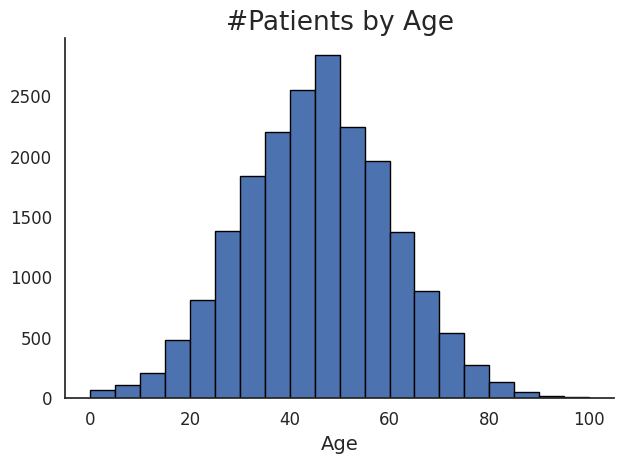

gender
Male      9865
Female    9738
Other      397
Name: count, dtype: int64


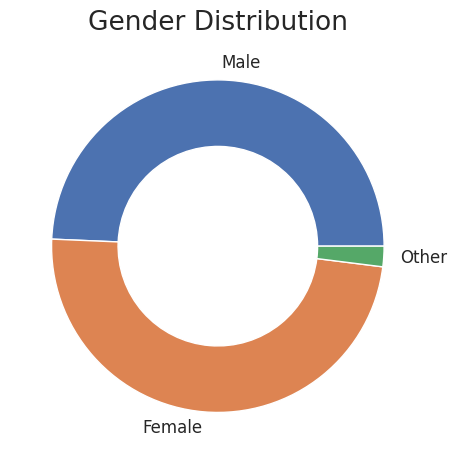

marital_status
Married     10007
Single       6072
Divorced     1980
Widowed      1941
Name: count, dtype: int64


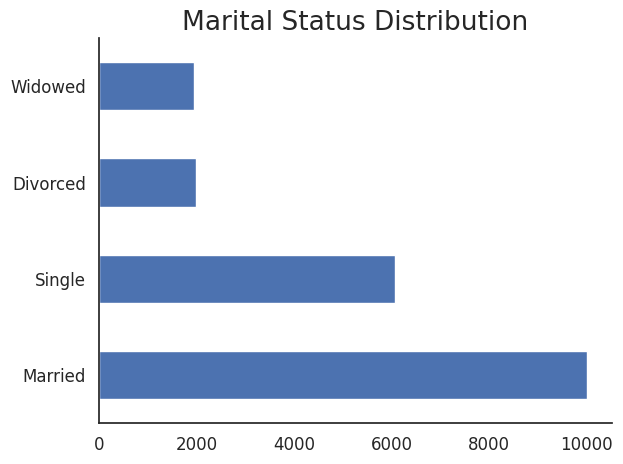

ethnicity
Caucasian           7917
African American    4056
Asian               3056
Hispanic            2921
Other               2050
Name: count, dtype: int64


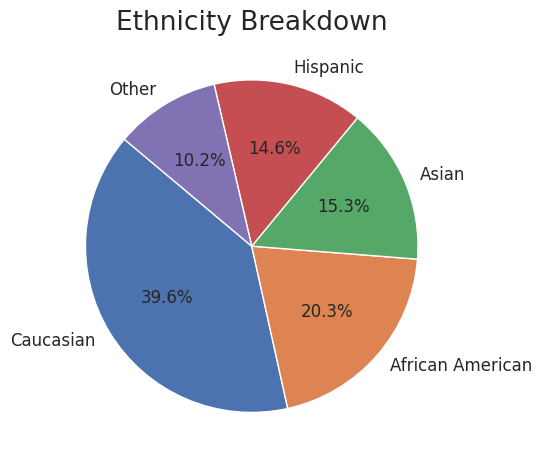

In [ ]:
#-------------------  Age  ---------------------------
# Summary statistics
print(df['age'].describe())

# Histogram of age
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('#Patients by Age')
plt.xlabel('Age')
plt.ylabel('')
plt.tight_layout()
sns.despine()
plt.show()


#------------------  Gender  -------------------------
# Count values
print(df['gender'].value_counts())

"""
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()
"""
# Donut plot
df['gender'].value_counts().plot(kind='pie', wedgeprops={'width':0.4})
plt.title('Gender Distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
sns.despine()
plt.show()


#-----------------  Marital Status  ------------------
print(df['marital_status'].value_counts())

df['marital_status'].value_counts().plot(kind='barh')
plt.title('Marital Status Distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
sns.despine()
plt.show()


#-----------------  Ethnicity  -----------------------
print(df['ethnicity'].value_counts())

"""df['ethnicity'].value_counts().plot(kind='bar')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Patients')
plt.show()
"""
ethnicity_counts = df['ethnicity'].value_counts()
ethnicity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Ethnicity Breakdown')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
sns.despine()
plt.show()


Look for Patterns/Segments

Age Groups by Gender

gender     Female  Male  Other
age_group                     
0-17          373   336     11
18-34        2180  2261    108
35-49        3733  3801    147
50-64        2641  2575    100
65+           792   880     31


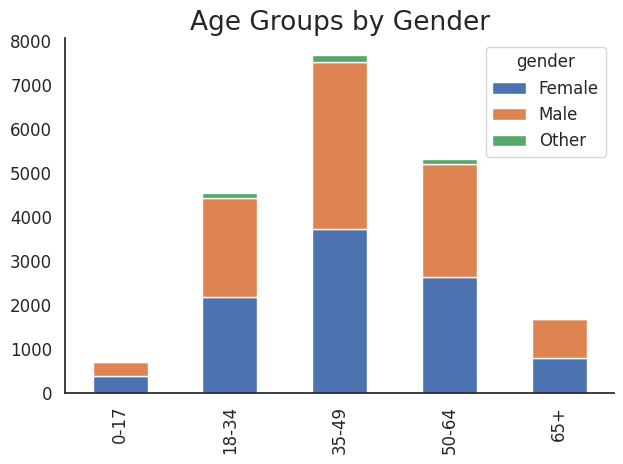

In [ ]:
# Create age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-17', '18-34', '35-49', '50-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Cross-tab
age_gender = pd.crosstab(df['age_group'], df['gender'])
print(age_gender)

# Stacked bar plot
age_gender.plot(kind='bar', stacked=True)
plt.title('Age Groups by Gender')
plt.xlabel('')
#plt.ylabel('Number of Patients')
plt.tight_layout()
sns.despine()
plt.show()


## 1.2. Disease Analysis

### Merge Demographics ("patients") with Disease Data ("medical_records")


In [ ]:
# Merge two tables: patient demographics with medical records
merged = pd.merge(df2, df, on='patient_id')

In [ ]:
merged.head(2)

,record_id,patient_id,diagnosis,diagnosis_date,visit_type,physician,cost,age,gender,marital_status,ethnicity,zip_code,age_group
0,REC000419,PAT03567,Common Cold,2020-06-08,Outpatient,Dr. Williams,160.03,36.0,Female,Single,Caucasian,89261,35-49
1,REC002378,PAT09059,Common Cold,2020-06-08,Outpatient,Dr. Williams,158.39,24.0,Male,Single,Caucasian,47179,18-34


### Distribution of Diseases






**a.Top Diseases**




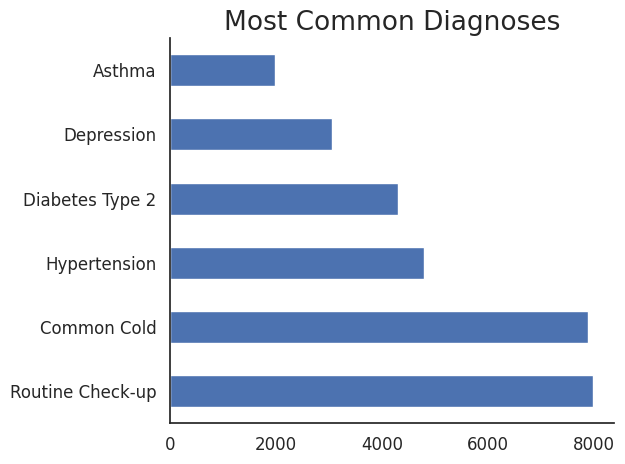

In [ ]:
# most common diseases
merged['diagnosis'].value_counts().plot(kind='barh')
plt.title('Most Common Diagnoses')
plt.ylabel('')
plt.tight_layout()
sns.despine()
plt.show()

**b. Disease by Age Group**



In [ ]:
sns.set_palette("Dark2")
#sns.set_palette("deep")

age_group         0-17  18-34  35-49  50-64  65+
diagnosis                                       
Asthma              53    477    830    471  155
Common Cold        341   2068   3100   1771  595
Depression         101    809   1130    744  266
Diabetes Type 2    128    659   1820   1249  440
Hypertension       121    814   1399   1822  632
Routine Check-up   333   2096   3097   1843  589


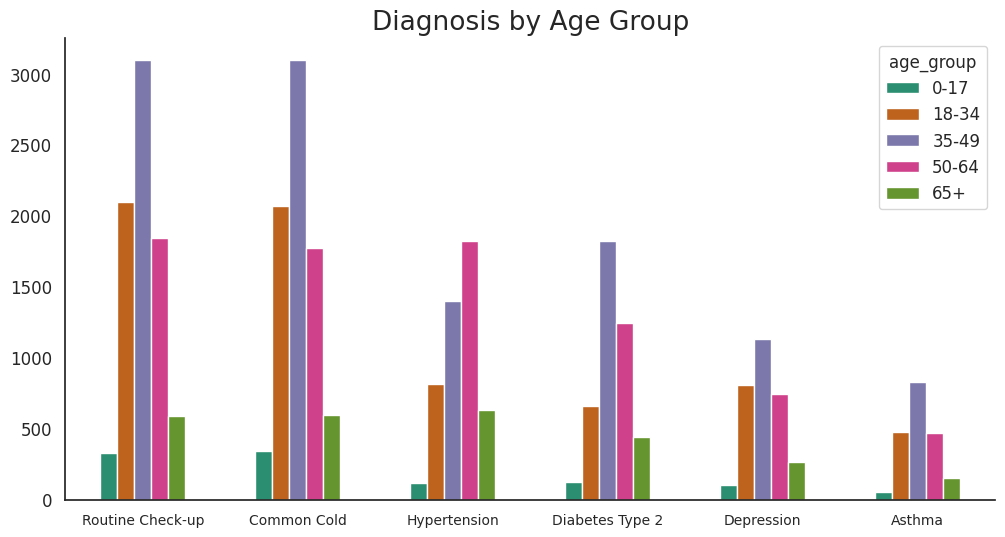

In [ ]:
# Cross-tab
age_diagnosis = pd.crosstab(merged['diagnosis'], merged['age_group'])
print(age_diagnosis)

# plot: Diagnosis vs Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=merged, x='diagnosis', hue='age_group',width=0.55,
              order=merged['diagnosis'].value_counts().index)

plt.title('Diagnosis by Age Group')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, fontsize=10)
sns.despine()
plt.show()

**c. Disease by Sex**



gender            Female  Male  Other
diagnosis                            
Asthma              1139   808     42
Common Cold         3723  4011    155
Depression          1966  1031     56
Diabetes Type 2     1995  2237     71
Hypertension        2134  2561     96
Routine Check-up    3709  4072    194


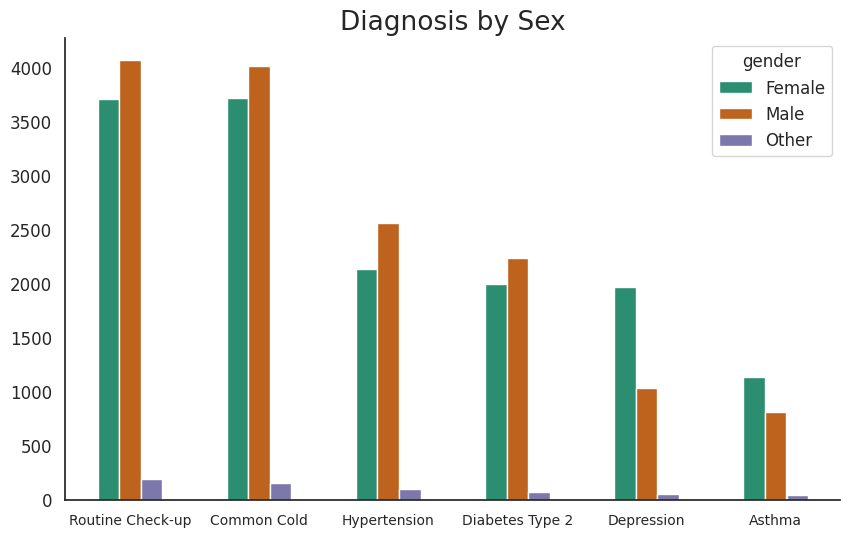

In [ ]:
#Crosstab
gender_diagnosis = pd.crosstab(merged['diagnosis'], merged['gender'])
print(gender_diagnosis)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=merged, x='diagnosis', hue='gender', width=0.5,
              order=merged['diagnosis'].value_counts().index)

plt.title('Diagnosis by Sex')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, fontsize=10)
sns.despine()
plt.show()

**d. Disease by ethnicity**



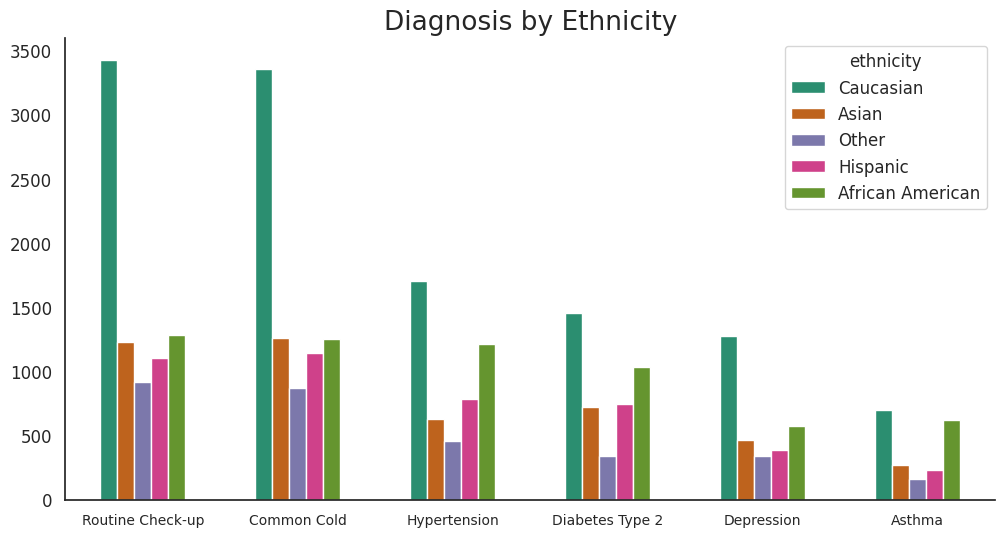

In [ ]:
# Plot (Diagnosis grouped by ethnicity)
plt.figure(figsize=(12, 6))
sns.countplot(data=merged, x='diagnosis', hue='ethnicity', width=0.55,
              order=merged['diagnosis'].value_counts().index)

plt.title('Diagnosis by Ethnicity')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, fontsize=10)
sns.despine()
plt.grid(False)
plt.show()

### Time Series Analysis on History of Cases with Diabetes

In [ ]:
# Find rows including diabetes
df_diabetes = df2[df2['diagnosis'] == 'Diabetes Type 2']

Analysis on Yearly, Quarterly and Monthly seasonality

In [ ]:
# Convert to datetime
df_diabetes['diagnosis_date'] = pd.to_datetime(df_diabetes['diagnosis_date'])

# Adding Year & Month & Quarter fields to the table
df_diabetes['year'] = df_diabetes['diagnosis_date'].dt.year
df_diabetes['month'] = df_diabetes['diagnosis_date'].dt.month
df_diabetes['month_name'] = df_diabetes['diagnosis_date'].dt.month_name()
df_diabetes['quarter'] = df_diabetes['diagnosis_date'].dt.quarter

# Count diabetes cases per different time intervals (like year & Month)
diabetes_per_year = df_diabetes.groupby('year').count()
diabetes_per_quarter = df_diabetes.groupby('quarter').count()
diabetes_per_month = df_diabetes.groupby('month').count()
diabetes_per_month_name = df_diabetes.groupby('month_name').count()
# Group by year and month
#---diabetes_per_yearmonth = df_diabetes.groupby(['year', 'month']).size().reset_index(name='case_count')
diabetes_per_yearmonth = df_diabetes.groupby(['year', 'month']).count()
diabetes_per_yearquarter = df_diabetes.groupby(['year', 'quarter']).count()

/tmp/ipython-input-189-1917395053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['diagnosis_date'] = pd.to_datetime(df_diabetes['diagnosis_date'])
/tmp/ipython-input-189-1917395053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['year'] = df_diabetes['diagnosis_date'].dt.year
/tmp/ipython-input-189-1917395053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

6 month period

In [ ]:
# Set it as index (only for grouping)
diabetes_per_6month=df_diabetes.set_index('diagnosis_date', inplace=False)

# Group by 6-month intervals
diabetes_per_6month = diabetes_per_6month.resample('6M').size().reset_index(name='case_count')

# Create a column with 6-month labels (format: YYYY-MM)
diabetes_per_6month['label'] = diabetes_per_6month['diagnosis_date'].dt.to_period('M').astype(str)

diabetes_per_6month.head(2)

/tmp/ipython-input-190-275651391.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  diabetes_per_6month = diabetes_per_6month.resample('6M').size().reset_index(name='case_count')


,diagnosis_date,case_count,label
0,2020-06-30,50,2020-06
1,2020-12-31,440,2020-12


In [ ]:
#sns.set_palette("Dark2")
sns.set_palette("deep")

Plot 6-month period

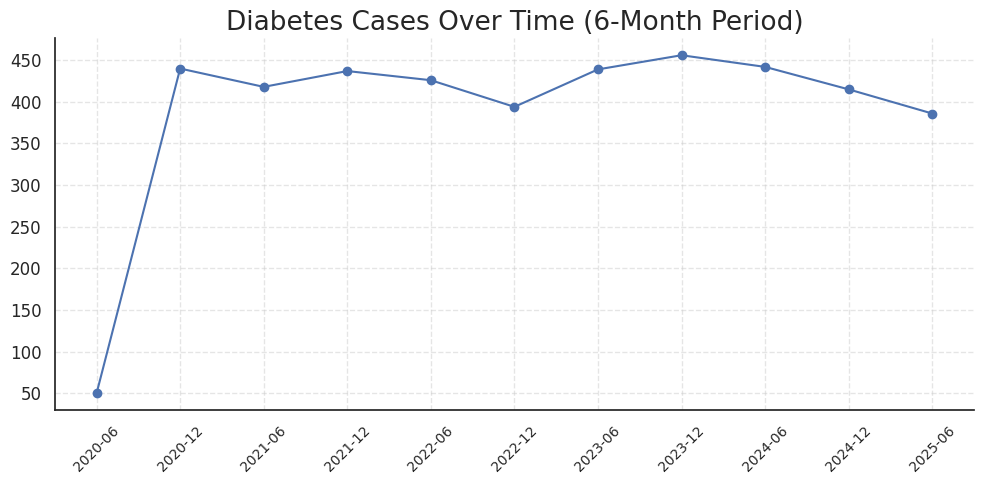

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(diabetes_per_6month['label'], diabetes_per_6month['case_count'], marker='o')

plt.title('Diabetes Cases Over Time (6-Month Period)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
sns.despine()
plt.show()

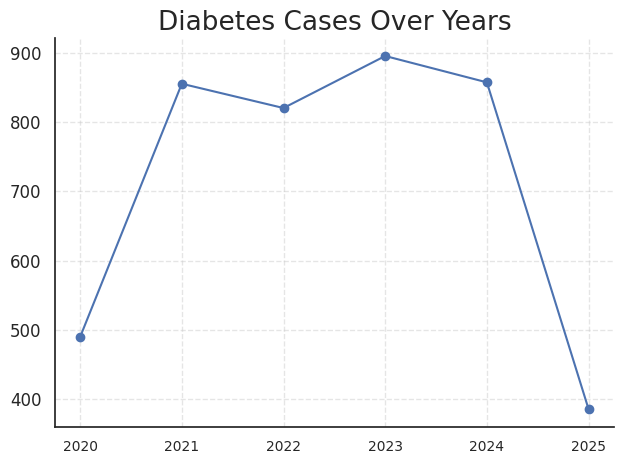

In [ ]:
#---sns.lineplot(data=diabetes_per_year, x=diabetes_per_year.index, y='diagnosis', marker='o', linewidth=2)
diabetes_per_year['diagnosis'].plot(kind='line', marker='o')
plt.title('Diabetes Cases Over Years')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

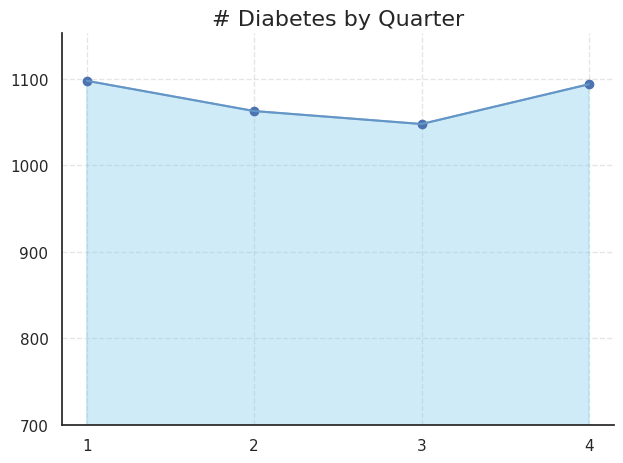

In [ ]:
# Plot
diabetes_per_quarter['diagnosis'].plot(kind='area', alpha=0.4, color='skyblue')

plt.title('# Diabetes by Quarter', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.ylim(bottom=700)
plt.xticks([1, 2, 3, 4], fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
diabetes_per_yearquarter.head()

record_id  patient_id  diagnosis  diagnosis_date  visit_type  \
year quarter                                                                 
2020 2               50          50         50              50          50   
     3              206         206        206             206         206   
     4              234         234        234             234         234   
2021 1              201         201        201             201         201   
     2              217         217        217             217         217   

              physician  cost  month  month_name  
year quarter                                      
2020 2               50    50     50          50  
     3              206   206    206         206  
     4              234   234    234         234  
2021 1              201   201    201         201  
     2              217   217    217         217

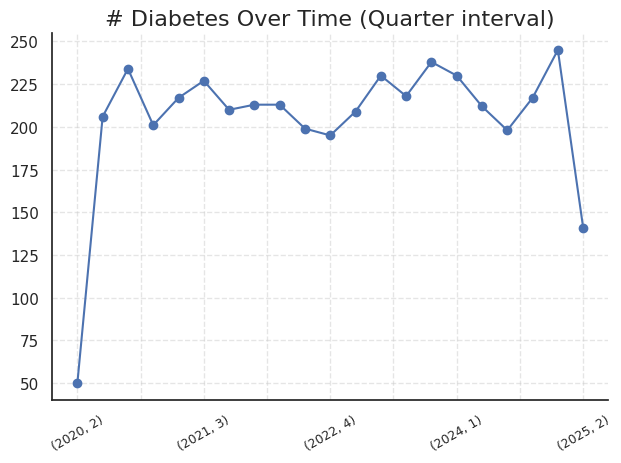

In [ ]:
# Plot
diabetes_per_yearquarter = diabetes_per_yearquarter[diabetes_per_yearquarter.index!=2020]
diabetes_per_yearquarter['diagnosis'].plot(kind='line', marker='o')

plt.title('# Diabetes Over Time (Quarter interval)', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=9, rotation=30)
plt.yticks(fontsize=11)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

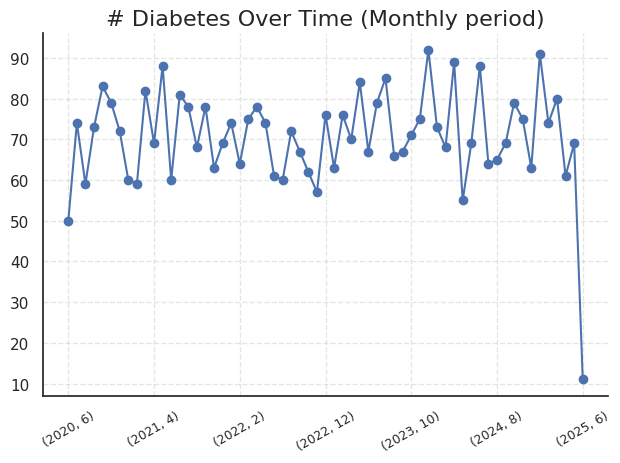

In [ ]:
# Plot
diabetes_per_yearmonth['diagnosis'].plot(kind='line', marker='o')

plt.title('# Diabetes Over Time (Monthly period)', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=9, rotation=30)
plt.yticks(fontsize=11)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

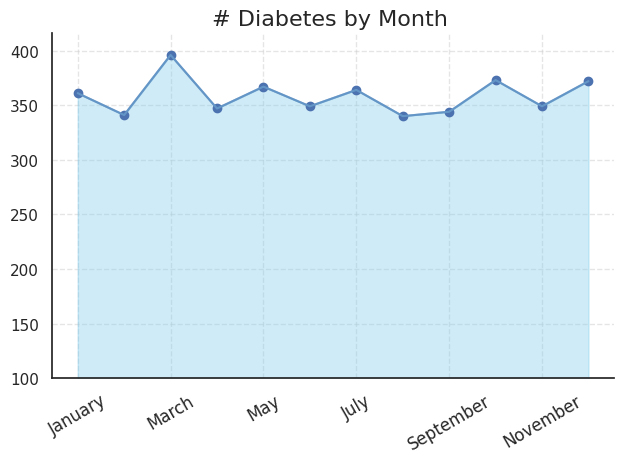

In [ ]:
# Define correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
# Reorder by calendar month
diabetes_per_month_name = diabetes_per_month_name.reindex(month_order)

# Plot
diabetes_per_month_name['diagnosis'].plot(kind='line', marker='o')
diabetes_per_month_name['diagnosis'].plot(kind='area', alpha=0.4, color='skyblue')

plt.title('# Diabetes by Month ', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.ylim(bottom=100)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=11)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

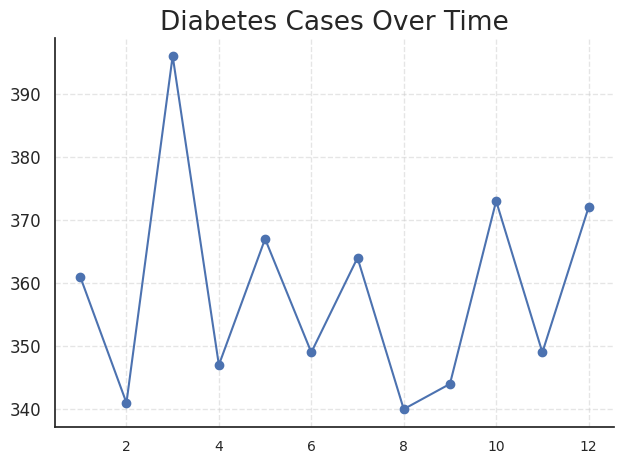

In [ ]:
diabetes_per_month['diagnosis'].plot(kind='line', marker='o')
plt.title('Diabetes Cases Over Time')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 1.4. Healthcare Utilization & Cost

**Part 1: Distribution of visit_type**

visit_type
Outpatient    18000
Telehealth     4610
Emergency      4454
Inpatient      2936
Name: count, dtype: int64


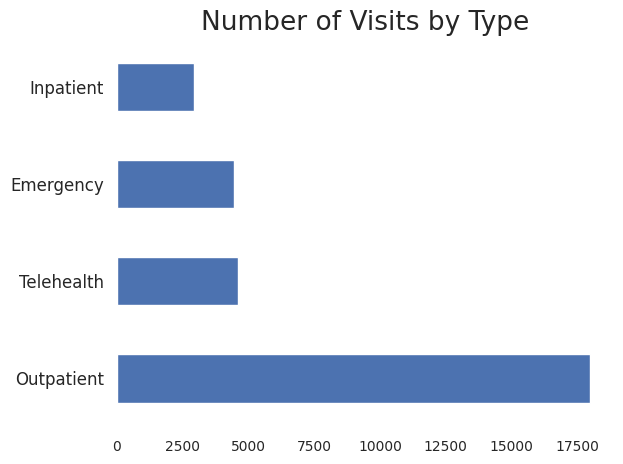

In [ ]:
visit_counts = df2['visit_type'].value_counts()
print(visit_counts)

# Plot
visit_counts.plot(kind='barh')
plt.title('Number of Visits by Type')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=00, fontsize=10)
plt.tight_layout()
#plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.show()
#sns.despine()
plt.show()


**Part 2: Average Cost per Visit by Type and Diagnosis**


In [ ]:
avg_cost = df2.groupby(['visit_type', 'diagnosis'])['cost'].mean().reset_index()
avg_cost = avg_cost.sort_values(by='cost', ascending=False)

print(avg_cost.head())
avg_cost.shape

    visit_type        diagnosis        cost
9    Inpatient  Diabetes Type 2  945.430354
15  Outpatient  Diabetes Type 2  942.610752
3    Emergency  Diabetes Type 2  941.144106
21  Telehealth  Diabetes Type 2  926.519051
2    Emergency       Depression  659.677937


(24, 3)

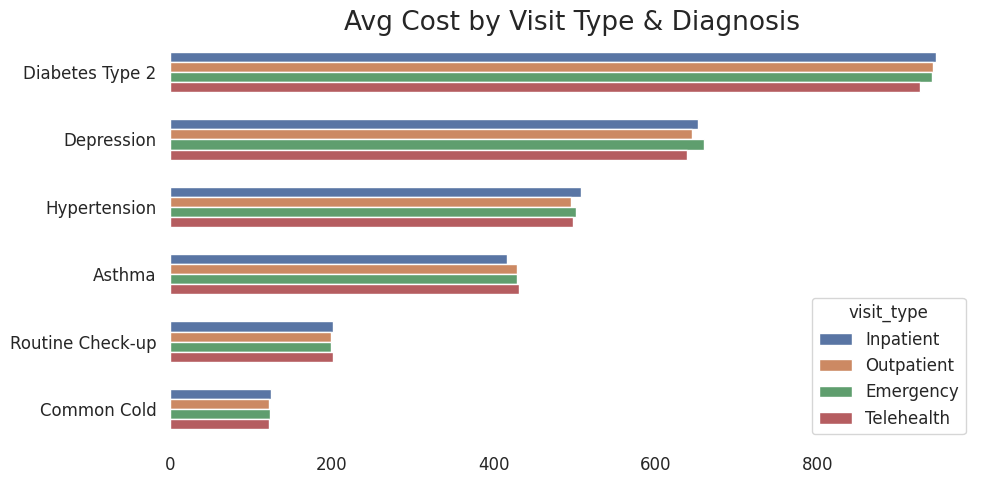

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_cost, x='cost', y='diagnosis', hue='visit_type', width=0.6)  # width controls bar thickness
plt.title('Avg Cost by Visit Type & Diagnosis')
plt.xlabel('')
#plt.xticks([], [])
plt.ylabel('')
plt.tight_layout()
sns.despine(left=True, bottom=True)
#sns.despine()

plt.show()


# 2. Biometric Analysis (analytical thinking)

**Here's my Biometric Analysis plan**


2.1.   Distribution & Patterns

-  What is the distribution of BMI, blood pressure, and cholesterol across all patients?

-  How does BMI vary by age or gender?

-  What percent of patients fall into healthy, overweight, or high-risk categories?



---
2.2   Correlations & Trends

-  Are there any strong correlations between blood pressure, and cholesterol?

-  Is there a relationship between age and cholesterol?



---
2.3.   Biometrics vs. Diagnosis

-  How does BMI differ for patients with diabetes, hypertension, or depression?

-  Do patients with hypertension tend to have higher cholesterol or blood pressure?

-  What is the average blood pressure for each diagnosis?






##2.1. Distribution & Patterns


### What is the distribution of BMI, blood pressure, and cholesterol across all patients?



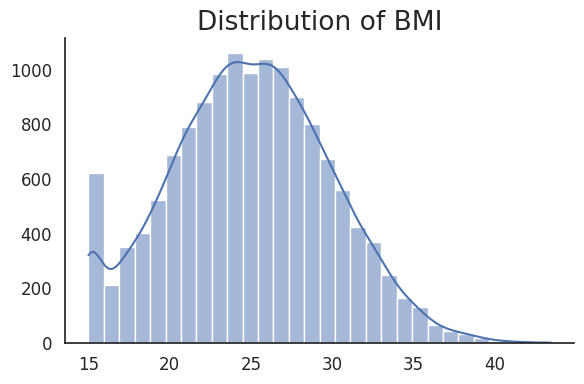

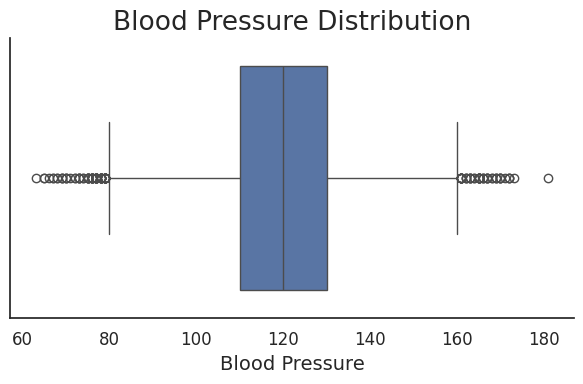

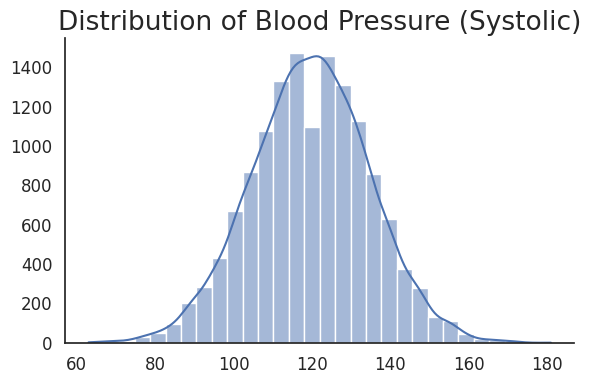

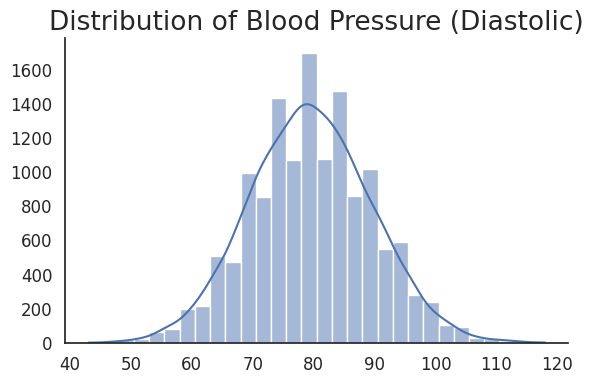

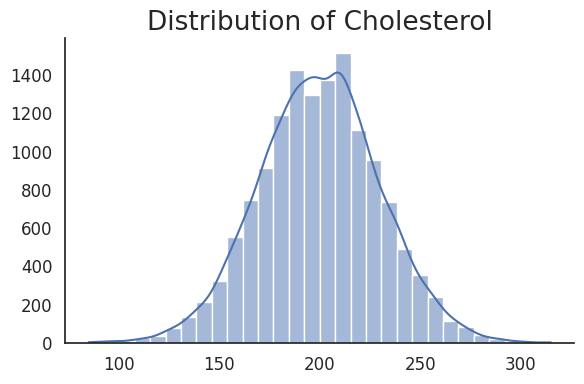

In [ ]:
# Load biometric data
df_bio = df3

# Plot distribution of BMI
plt.figure(figsize=(6, 4))
sns.histplot(df3['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()


#--------------------------
# Boxplot of Blood Pressure
plt.figure(figsize=(6, 4))
sns.boxplot(x=df3['blood_pressure_systolic'])
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
sns.despine()
plt.tight_layout()
plt.show()

# Plot distribution of Blood Pressure
plt.figure(figsize=(6, 4))
sns.histplot(df3['blood_pressure_systolic'], kde=True, bins=30)
plt.title('Distribution of Blood Pressure (Systolic)')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()
# Plot distribution of Blood Pressure
plt.figure(figsize=(6, 4))
sns.histplot(df3['blood_pressure_diastolic'], kde=True, bins=30)
plt.title('Distribution of Blood Pressure (Diastolic)')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()
#--------------------------


# Distribution of Cholesterol
plt.figure(figsize=(6, 4))
sns.histplot(df3['cholesterol_total'], kde=True, bins=30)
plt.title('Distribution of Cholesterol')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()


### How does BMI vary by age or gender?



In [ ]:
# First, we need to Merge on 'patient_id'
merged_df = pd.merge(df, df3, on='patient_id', how='inner')
merged_df.head(2)

,patient_id,age,gender,marital_status,ethnicity,zip_code,age_group,bmi,blood_pressure_systolic,blood_pressure_diastolic,cholesterol_total
0,PAT00001,33.0,Male,Divorced,African American,92106,18-34,21.283985,131,78,191.0
1,PAT00002,54.0,Female,Married,African American,24249,50-64,21.267961,103,65,211.0


/tmp/ipython-input-226-823924430.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='age_group', y='bmi', hue='gender', width=0.4,  ci=None)


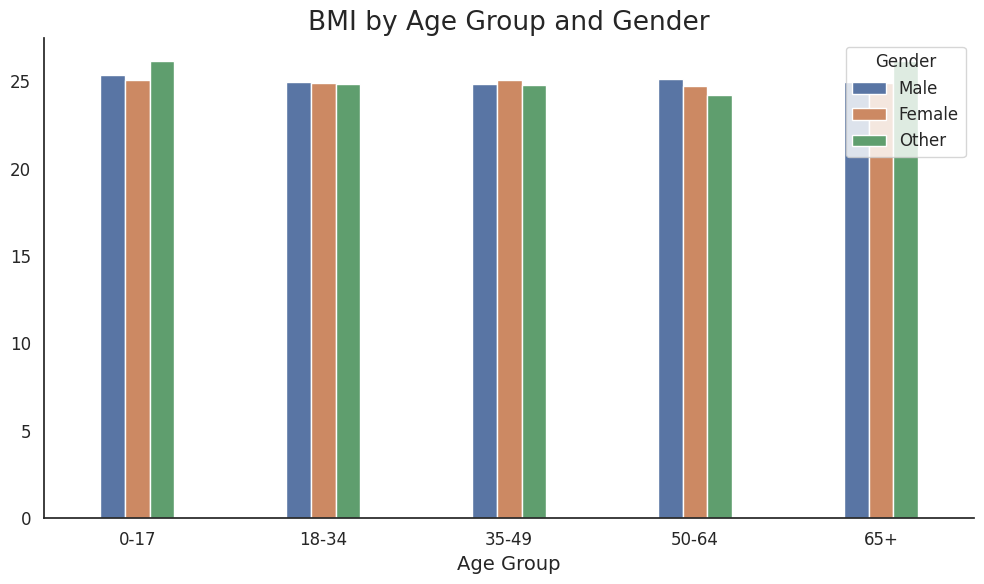

In [ ]:
# Plot BMI distribution by age group and gender
plt.figure(figsize=(10, 6))
#sns.boxplot(data=merged_df, x='age_group', y='bmi', hue='gender')
sns.barplot(data=merged_df, x='age_group', y='bmi', hue='gender', width=0.4,  ci=None)

plt.title('BMI by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('')
plt.legend(title='Gender')
plt.tight_layout()
sns.despine()
plt.show()

### What percent of patients fall into healthy, overweight, or high-risk categories?

In [ ]:
# Step 1: Categorize BMI
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'High-risk'

df['bmi_group'] = df3['bmi'].apply(bmi_category)

# Step 2: Calculate percentage distribution
bmi_distribution = df['bmi_group'].value_counts(normalize=True) * 100
print(bmi_distribution)

bmi_group
Healthy        40.035714
Overweight     33.935714
High-risk      15.664286
Underweight    10.364286
Name: proportion, dtype: float64


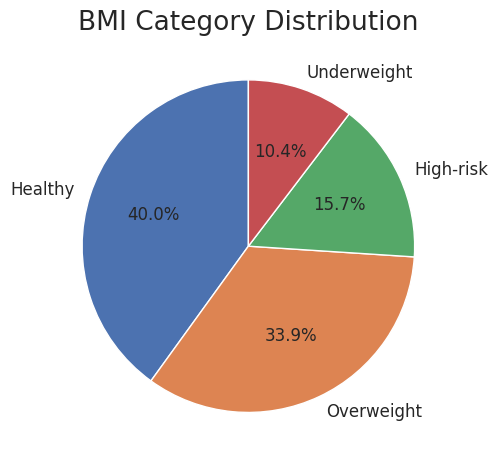

  BMI Category  Percentage
0      Healthy   40.035714
1   Overweight   33.935714
2    High-risk   15.664286
3  Underweight   10.364286


In [ ]:
# Pie chart
bmi_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('BMI Category Distribution')
plt.ylabel('')  # Removes the y-axis label
plt.tight_layout()
plt.show()

##2.2 Correlations & Trends

### Are there any strong correlations between BMI, blood pressure, and cholesterol?



                              age  blood_pressure_systolic  cholesterol_total
age                      1.000000            -1.039672e-02      -5.930838e-03
blood_pressure_systolic -0.010397             1.000000e+00      -5.571030e-07
cholesterol_total       -0.005931            -5.571030e-07       1.000000e+00


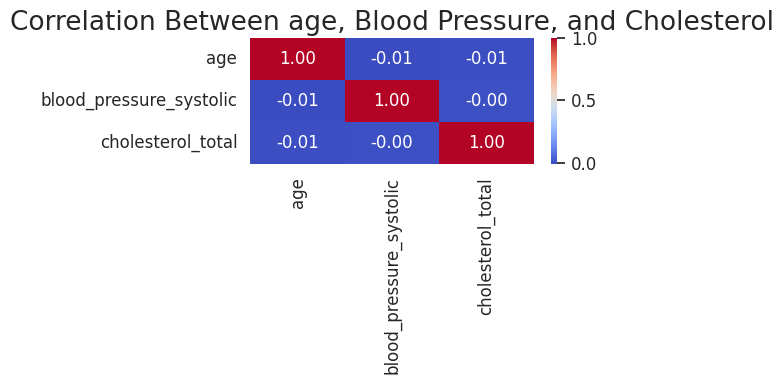

In [263]:
# Select relevant columns
biometric_cols = ['age', 'blood_pressure_systolic', 'cholesterol_total']
biometric_data = merged_df[biometric_cols].dropna()

# Correlation matrix
correlation_matrix = biometric_data.corr()

# Display correlation values
print(correlation_matrix)

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between age, Blood Pressure, and Cholesterol')
plt.tight_layout()
plt.show()

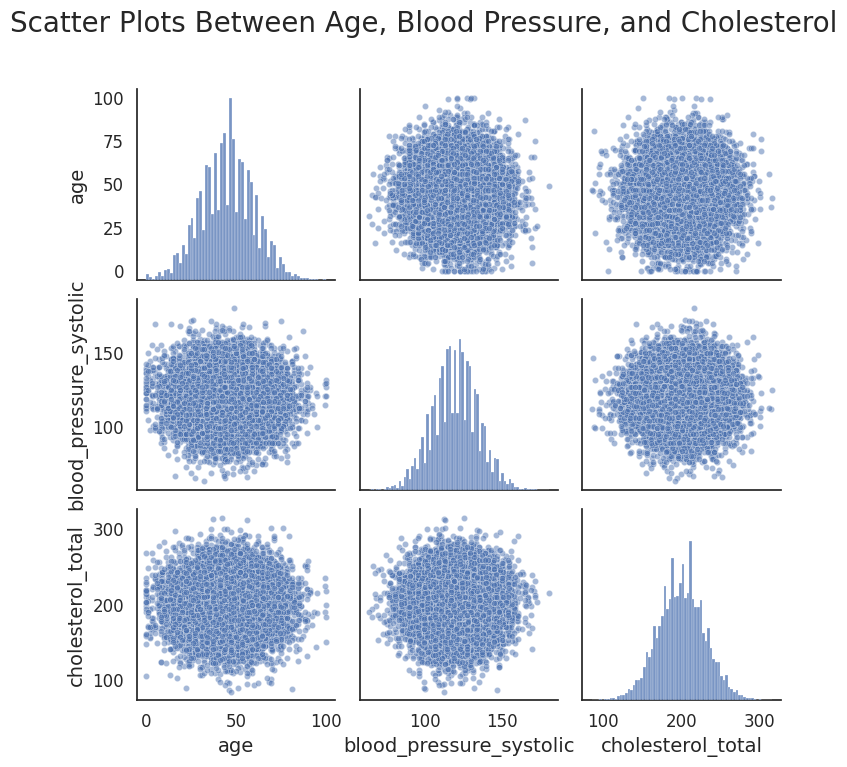

In [264]:
# Pairwise scatter plots
sns.pairplot(biometric_data, kind='scatter', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle("Scatter Plots Between Age, Blood Pressure, and Cholesterol", fontsize=20, y=1.02)
plt.tight_layout()
plt.xticks(fontsize=8, rotation=30)
plt.yticks(fontsize=8)
plt.show()


### Is there a relationship between age and cholesterol?



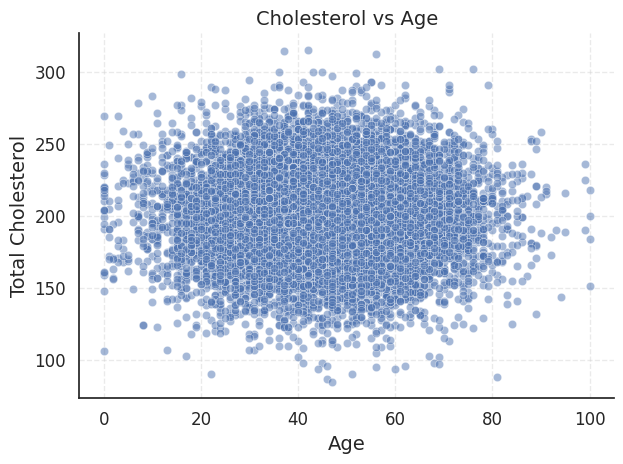

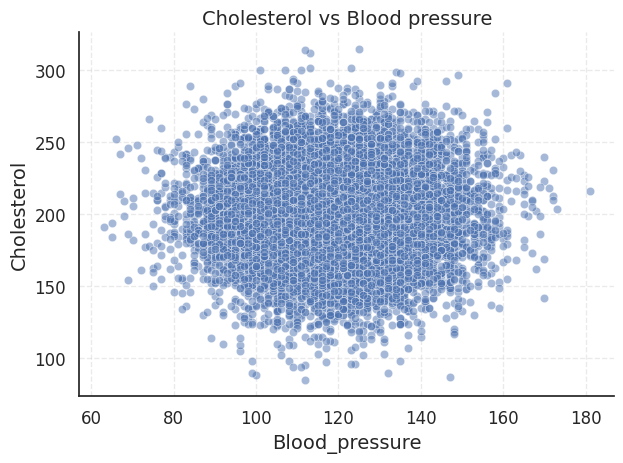

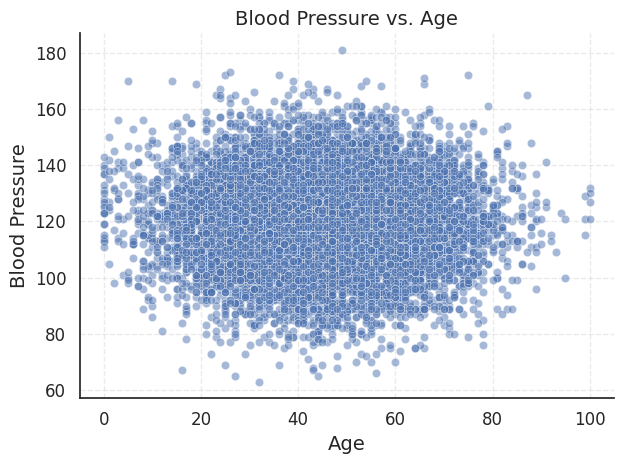

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Age vs. Cholesterol
sns.scatterplot(data=merged_df, x='age', y='cholesterol_total', alpha=0.5)

plt.title('Cholesterol vs Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
sns.despine()
plt.show()



# Scatter plot: Blood pressure vs. Cholesterol
sns.scatterplot(data=df3, x='blood_pressure_systolic', y='cholesterol_total', alpha=0.5)

plt.title('Cholesterol vs Blood pressure', fontsize=14)
plt.xlabel('Blood_pressure')
plt.ylabel('Cholesterol')
plt.grid(True, linestyle='--', alpha=0.4)
sns.despine()
plt.tight_layout()
plt.show()



# Scatter plot: BMI vs. Systolic Blood Pressure
sns.scatterplot(data=merged_df, x='age', y='blood_pressure_systolic', alpha=0.5)

plt.title('Blood Pressure vs. Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
sns.despine()
plt.show()


##2.3.   Biometrics vs. Diagnosis

will be completed soon ...